## Analyze A/B Test Results
#### by Adaobi Onyeakagbu

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, reading in the `ab_data.csv` data. Store it in `df`. 

In [2]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Using the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
users= df.user_id.unique()
len(users)

290584

d. The proportion of users converted.

In [5]:
(len(df.loc[(df['converted']== True)])/ len(df.loc[df['converted']])) *100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. We will drop those that don't match and store in a new dataframe.

In [8]:
df2= df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)
             
             

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
counts= df2.user_id.value_counts()
print(counts)

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [12]:
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset=['user_id'], inplace=True);

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_cont= df2[df2['group'] == 'control'].converted.mean()
print(p_cont)

0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
p_treat= df2[df2['group'] == 'treatment'].converted.mean()
print(p_treat)
#df2.query('group=="control"').converted.mean()


0.118808065515


d. What is the probability that an individual received the new page?

In [17]:
len(df2[df2['landing_page'] == 'new_page'])/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


**I do not think the click through rate in this case is sufficient evidence to conclude that the new treatment page leads to more conversions since the CTR values are both approximately the same. The probability of an individual converting regardless of the page they receive is approximately 0.12 which is same (approx) as the probability an individual in the Control or Treatment group converted.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, one could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is does one stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long does one run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider that one needs to make the decision just based on all the data provided.  If one wants to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should the null and alternative hypotheses be?

**Null Hypothesis:   This is the condition we assume to always be true, that is when p-value of the sample test is greater than Type 1 error rate of 5%. In this case, that the old page does better or equal to new page.**

**Alternative Hypothesis: This hypothesis is only accepted to be true if p-value of the sample test is less than or equal to Type 1 error rate of 5%. In this case, that the new page does better than the old page.**

`2.` Assuming under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, we assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

We will use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

We also perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new= df2.converted.mean() #same as the probability of converted regardless of the page

print(p_new)


0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old= df2.converted.mean() #pold = pnew

print(p_old)

0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new= len(df2[df2['group'] == 'treatment'])
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old= len(df2[df2['group'] == 'control'])
print(n_old)

145274


e. Simulating $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null and storing these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
np.random.seed(42)

new_page_converted= np.random.binomial(1, p=p_new, size=n_new)
    
print(new_page_converted)

[0 1 0 ..., 0 0 0]


f. Simulating $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null and storing these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted= np.random.binomial(1, p=p_old, size=n_old)
    
print(old_page_converted)

[0 0 0 ..., 0 0 1]


g. Find $p_{new}$ - $p_{old}$ for the simulated values from part (e) and (f).

In [24]:

new_page_converted.mean()- old_page_converted.mean()


-0.0023973022979572739

h. Creating 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process used in parts (a) through (g) above and storing all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
#p_diffs = []
# for _ in range(10000):
#     new_page_converted1 = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
#     old_page_converted1 = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
#     p_diffs.append(new_page_converted1.mean() - old_page_converted1.mean())
    
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plotting a histogram of the **p_diffs**. 

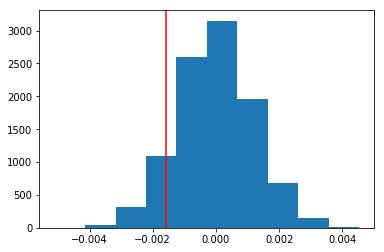

In [26]:
actual_diff= p_treat - p_cont
plt.hist(p_diffs)
plt.axvline(actual_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:

(p_diffs>actual_diff).mean()


0.90810000000000002

k. What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value computed in j is the P-value, which is the conditional probability of the data given that the null value is true. Since we assumed a Type I error rate of 5%, we will fail to reject the null hypothesis because the P value of 0.90 is much larger than the alpha of 0.05. The test did not prove that the new page does better than the old page.**

l. Using Built in functions: We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
np.warnings.filterwarnings("ignore")

import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').count()[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').count()[0]
n_old = df2[df2['landing_page'] == 'old_page'].count()[0]
n_new = df2[df2['landing_page'] == 'new_page'].count()[0]
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now using `stats.proportions_ztest` to compute the test statistic and p-value.

In [29]:
#testing p_new > p_old
z_stat, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative= 'larger')

print("The test statistic for the z-test is {} and the P-value is {}".format(z_stat, p_value))

The test statistic for the z-test is -1.3109241984234394 and the P-value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since this is a one-sided test, the calculated Z score has to be greater than the critical value (1.96) or the P-value must be less than or equal to 0.05 for us to reject the null hypothesis (i.e. the conversion rate of the old page is greater or equal to the conversion rate of the new page).** 

**Since neither the resulting z-score of -1.31 and P-value of 0.905 fulfils this condition, it means we will not reject the null hypothesis i.e. the conversion rate of the new page is not better than that of the old page. 
This result from question m agrees with findings from j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we can see that the result achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We will use Logistic regression because this is a binary classification problem.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, we first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received. 

In [30]:
df2['ab_page']= df2['group']
cleanup_nums = {"ab_page": {"control": 0, "treatment": 1}} #encoding control and treatment
df2.replace(cleanup_nums, inplace=True)
df2['intercept']= 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Using **statsmodels** to instantiate the regression model on the two columns created in part b., then fitting the model using the two columns to predict whether or not an individual converts. 

In [31]:
from scipy import stats

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) # this is a workaround for issue with missing function chisqprob
#reference: https://github.com/statsmodels/statsmodels/issues/3931

logreg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]) #converted is the target while ab_page is x
model = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Providing the summary of the model below.

In [32]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        05:37:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value found in **Part II**?<br><br>  What are the null and alternative hypotheses associated with the regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The null hypothesis of this regression model is that conversion rate is indedependent of treatment and control group or basically, the same. The Alternative is that conversion rate is dependent on the group, or basically, conversion rate is different for each group.**

**On the other hand, the null and alternative hypotheses of Part II assumes that the old page is better unless the new page proves to be better at a Type I error rate of 5%.**

**P-value for ab_page from the regression model is 0.19, which is greater than 0.05, hence it is not statistically relevant to the outcome of conversion.**

**The P-value of the regression model differs from that of part II because it is a two-tailed test while Part II is one-tailed.**

f. Now, considering other things that might influence whether or not an individual converts.  We discuss why it is a good idea to consider other factors to add into the regression model.  Are there any disadvantages to adding additional terms into the regression model?

**There could be other factors that affect conversion, such as, for instance the age of a user. While trying to test more factors, one has to carefully choose the correct variables to enter into the model. If there are too many input variables, it can affect true associations and misleading statistical significance. For instance, input variables that are highly correlated with one another, known as multicollinearity, can make the regression model become less precise.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. We will read in the **countries.csv** dataset and merge together the datasets on the appropriate rows.

Does it appear that country had an impact on conversion?  The dummy variables for these country columns are two instead of three to reduce interdependency between variables.

In [33]:
countries = pd.read_csv('countries.csv')
#joining the two dataframe based on user id
df3 = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [34]:
df3[['UK','US']]= pd.get_dummies(df3["country"],drop_first=True) #drop first column to avoid interdependency between variable columns
df3.head()


,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [35]:
logreg1 = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'US']])
model1 = logreg1.fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:               1.521e-05
Time:                        05:37:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**The P-value result from the above logistic regression shows that the countries UK and US did not have an impact on conversion, as both p values are greater than 0.05, hence statistically insignificant.**

h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  We will create the necessary additional columns which show the interaction between country and page group, and fit the new model.  

In [39]:
#creating columns for the relationship between group and country
df3['US_ab_page'] =  df3['US'] *  df3['ab_page']
df3['UK_ab_page'] =  df3['UK'] *  df3['ab_page']
df3.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,1


In [41]:
logreg2 = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'US', 'ab_page', 'US_ab_page', 'UK_ab_page']])
model2 = logreg2.fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:               3.482e-05
Time:                        05:54:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**In this case we are considering both country and page as factors that affect conversion rate. Except for Intercept, none of the p-values are statistically significant to conversion as they are larger than 0.05. Basically, the user's country, given either group, is not a significant factor in determining whether the user will convert or not.**


### Conclusions
**The Click through rate, A/B test and Logistic Regression all say that there is no sufficient evidence for the e-Commerce company to accept that the new page does better than the old page and run the new page. Therefore, we fail to reject the null hypothesis and suggest that the company retains the old page.**

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0